In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
crime_df=pd.read_csv("Min_downsampled_df_Mar7_ 539576.csv", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (539576, 77)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

# Prepare for Data Training

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

In [5]:
# # Drop all the weather
# crime_df=crime_df.drop(['Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
#        'Avg_Pressure','Total_Precipitation'], axis =1)

# Droop all victim
crime_df=crime_df.drop(['Vict_Sex_M', 'Vict_Sex_X','Vict_Age','Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White'], axis =1)

In [6]:
print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (539576, 69)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'LAT', 'LON', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation', 'Crime_Category', 'Crime_Category_Code',
       'Weapon_Reported', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6',
       'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023'],
      dtype='objec

In [7]:
# Selecting predictor and target variables
X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Model Logistic without victim: lr_wo_victim

In [10]:
logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.47450795062826645
Confusion Matrix:
[[ 9521   235     0  3630     0     9    86    39]
 [   25  8032     0     0     0    81  2022  3367]
 [ 2356  1723     0   350     0  7364   861   911]
 [   98   115     0 13007     0    42    65   153]
 [ 1233  3918     0  4563     0   149  1474  2101]
 [    3   142     0   572     0 12282    67   135]
 [ 1071  5276     0    41     0   209  3185  3741]
 [  673  5141     0     0     0     0  2668  5180]]



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.64      0.70      0.67     13520
        Fraud and Financial Crimes       0.33      0.59      0.42     13527
              Miscellaneous Crimes       0.00      0.00      0.00     13565
             Robbery and Extortion       0.59      0.96      0.73     13480
                   Sexual Offenses       0.00      0.00      0.00     13438
                Theft and Burglary       0.61      0.93      0.74     13201
     Vandalism and Property Damage       0.31      0.24      0.27     13523
 Violations and Restraining Orders       0.33      0.38      0.35     13662

                          accuracy                           0.47    107916
                         macro avg       0.35      0.48      0.40    107916
                      weighted avg       0.35      0.47      0.40    107916



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                Feature  Importance
9       Weapon_Reported    2.449163
0              Part_1-2    0.097904
59            Year_2023    0.081013
3              Avg_Temp    0.068302
4          Avg_Dewpoint    0.063932
46             Month_12    0.060201
35        Day_of_Week_6    0.059355
37              Month_3    0.057606
39              Month_5    0.053594
36              Month_2    0.052747
45             Month_11    0.049312
57            Year_2021    0.045566
38              Month_4    0.042308
55            Year_2019    0.038785
53            Year_2017    0.037959
1                   LAT    0.036780
44             Month_10    0.031098
40              Month_6    0.028391
34        Day_of_Week_5    0.025259
56            Year_2020    0.022897
41              Month_7    0.021996
54            Year_2018    0.020900
8   Total_Precipitation    0.018506
43              Month_9    0.016763
58            Year_2022    0.014308
42              Month_8    0.012608
52     

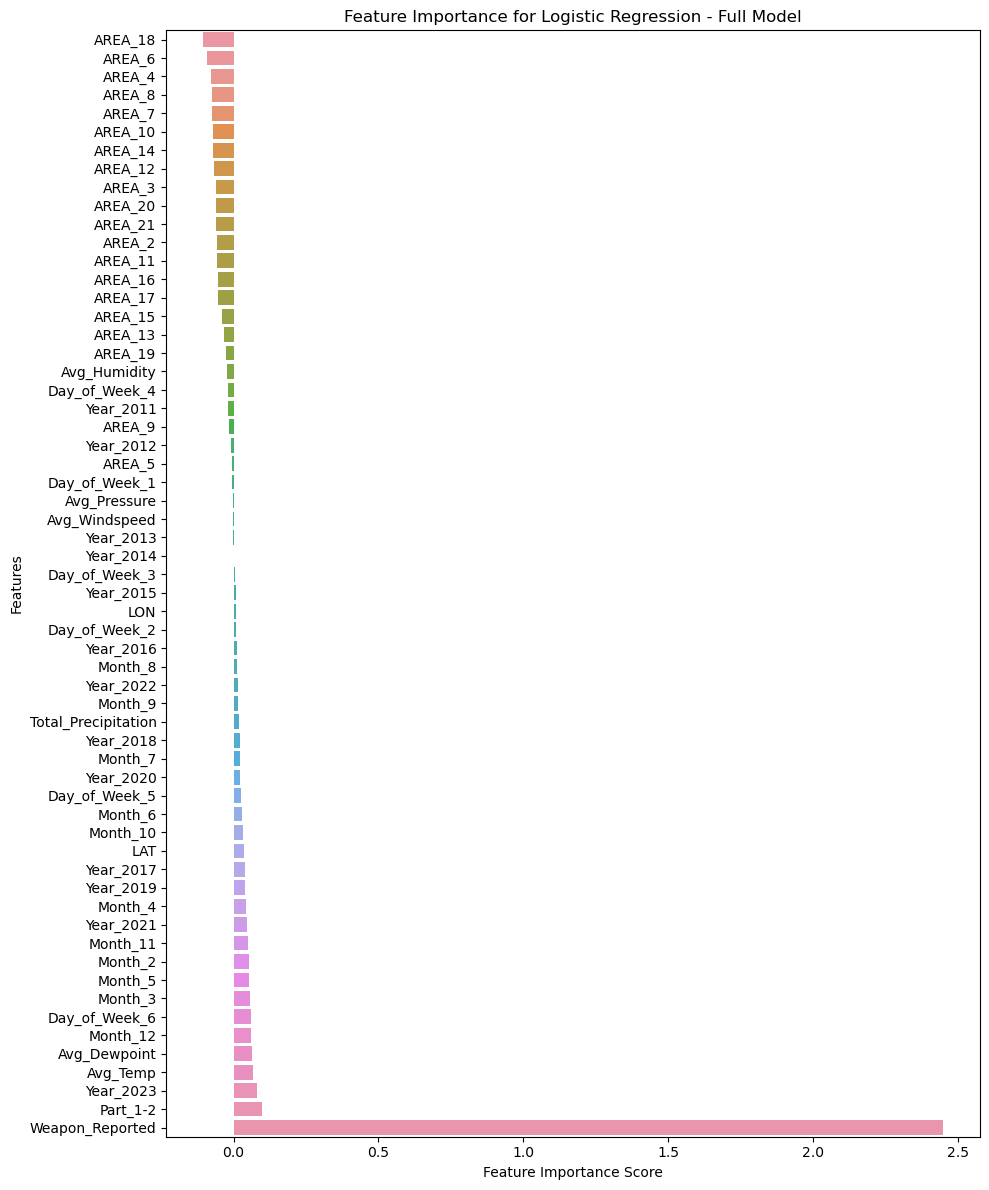

In [12]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression - Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# # Model XGBOOST: xgboost_wo_victim

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost: Withou Victims")

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")

XGBoost: Withou Victims
Accuracy: 0.49134512027873534
Confusion Matrix:
[[ 9519   188    40  3511    80    10   107    65]
 [   22  8186    11     0   108    88  2289  2823]
 [ 2251  1530   737   335    55  6743   922   992]
 [  138   116     3 12800   167    41    69   146]
 [ 1201  3713    60  4034   654   135  1651  1990]
 [    8   123   643   529    21 11684    77   116]
 [ 1063  4616    20    41    59   201  3920  3603]
 [  671  4457     5     0    56     4  2945  5524]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.64      0.70      0.67     13520
        Fraud and Financial Crimes       0.36      0.61      0.45     13527
              Miscellaneous Crimes       0.49      0.05      0.10     13565
             Robbery and Extortion       0.60      0.95      0.74     13480
                   Sexual Offenses       0.55      0.05      0.09     13438
                Theft and Burglary    

In [14]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                Feature  Importance
9       Weapon_Reported    0.455854
0              Part_1-2    0.407443
13               AREA_5    0.009811
59            Year_2023    0.005191
22              AREA_14    0.004895
35        Day_of_Week_6    0.004203
12               AREA_4    0.003806
47            Year_2011    0.003730
34        Day_of_Week_5    0.003644
57            Year_2021    0.003554
58            Year_2022    0.003538
54            Year_2018    0.003403
56            Year_2020    0.003396
55            Year_2019    0.003306
26              AREA_18    0.003189
23              AREA_15    0.002987
21              AREA_13    0.002941
48            Year_2012    0.002772
16               AREA_8    0.002602
24              AREA_16    0.002420
53            Year_2017    0.002302
2                   LON    0.002237
1                   LAT    0.002142
51            Year_2015    0.002116
46             Month_12    0.002100
52            Year_2016    0.002088
3      

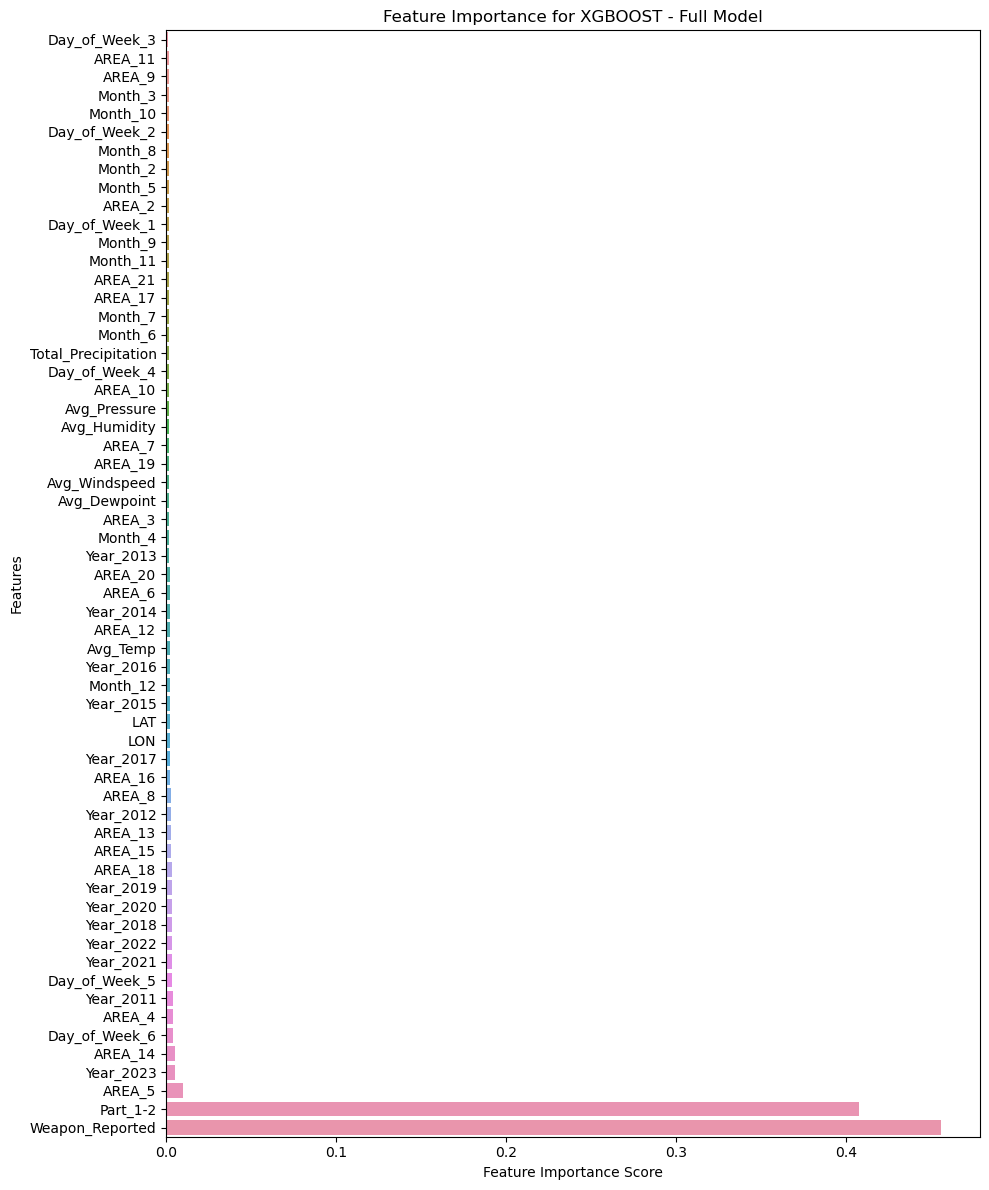

In [15]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST - Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# # Model Random Forest: rf_wo_victim

In [16]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.4998980688683791
Confusion Matrix:
[[ 9319   120   371  2834   472    33   243   128]
 [   61  6063   452    28  1334   108  2833  2648]
 [ 1876   991  2945   258   415  5279   927   874]
 [  722    85    54 11462   888    82    87   100]
 [ 1046  1926   322  2939  4148   144  1509  1404]
 [   49   114  2345   449    97  9960    98    89]
 [  966  3270   540    63  1162   195  4265  3062]
 [  566  2857   458    30  1056    32  2878  5785]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.64      0.69      0.66     13520
        Fraud and Financial Crimes       0.39      0.45      0.42     13527
              Miscellaneous Crimes       0.39      0.22      0.28     13565
             Robbery and Extortion       0.63      0.85      0.73     13480
                   Sexual Offenses       0.43      0.31      0.36     13438
                Theft and Burgl

In [17]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                Feature  Importance
1                   LAT    0.139133
2                   LON    0.138635
0              Part_1-2    0.124411
9       Weapon_Reported    0.119920
5          Avg_Humidity    0.062297
3              Avg_Temp    0.061499
4          Avg_Dewpoint    0.061195
6         Avg_Windspeed    0.059669
7          Avg_Pressure    0.028553
33        Day_of_Week_4    0.008391
31        Day_of_Week_2    0.008281
30        Day_of_Week_1    0.008166
32        Day_of_Week_3    0.008138
8   Total_Precipitation    0.006956
34        Day_of_Week_5    0.006014
44             Month_10    0.005726
38              Month_4    0.005613
39              Month_5    0.005498
37              Month_3    0.005490
45             Month_11    0.005456
40              Month_6    0.005356
53            Year_2017    0.005080
52            Year_2016    0.005022
43              Month_9    0.005008
41              Month_7    0.004974
42              Month_8    0.004971
36     

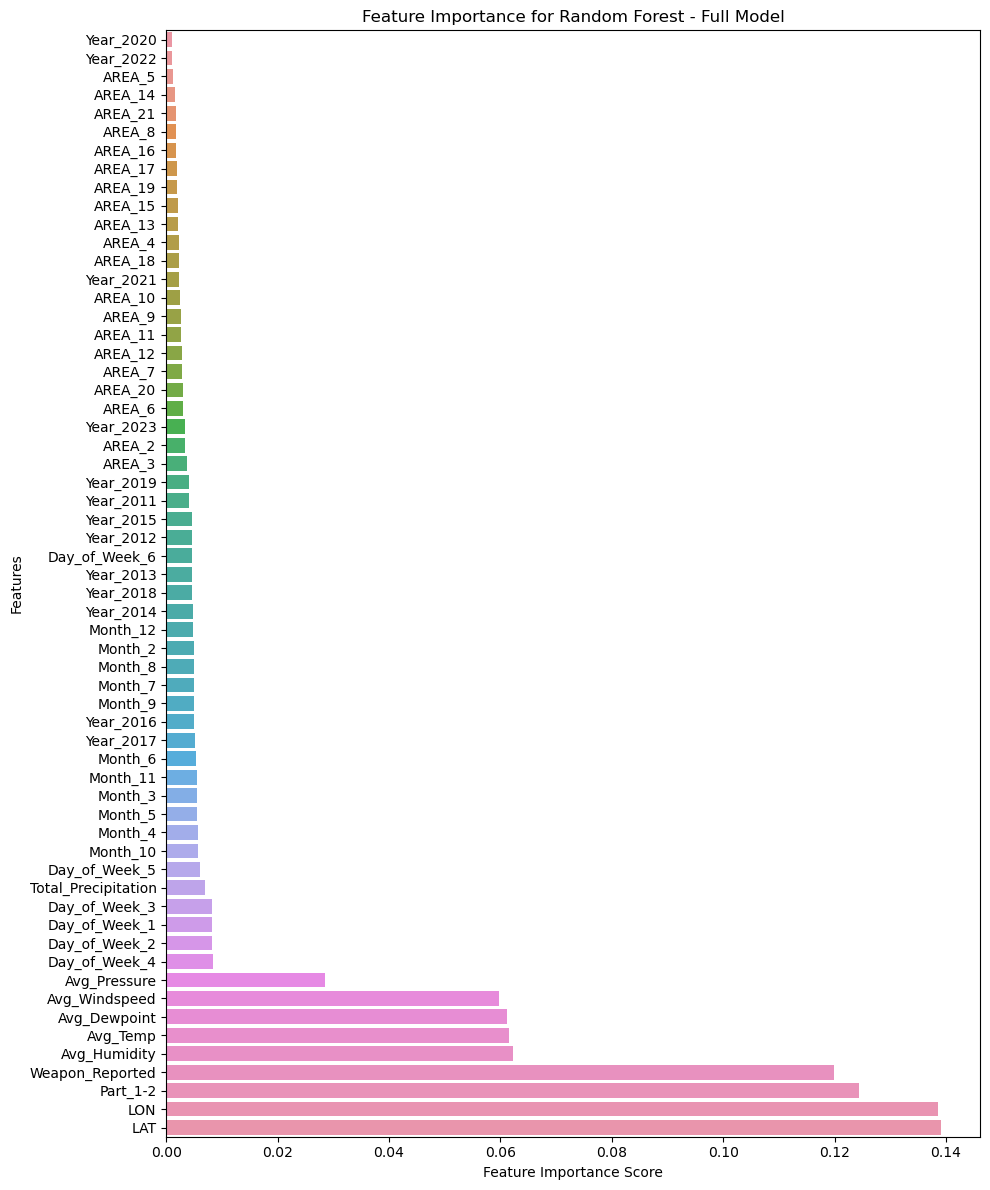

In [18]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest - Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# # Model KNN: knn7_wo_victim

In [19]:
# Training the model and predicting on test data
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.31733941213536454
Confusion Matrix:
[[5890 1091  945 2808 1124  383  680  599]
 [ 527 6103  953  126 1412  466 2045 1895]
 [1608 2407 2721  946 1052 2713 1116 1002]
 [3213  366 1068 6643  938  915  176  161]
 [2010 2903 1126 1892 2271  673 1313 1250]
 [ 480 1751 3146 1020  798 4680  666  660]
 [1228 3945 1158  291 1439  656 2706 2100]
 [ 919 3838 1097  202 1403  541 2430 3232]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.37      0.44      0.40     13520
        Fraud and Financial Crimes       0.27      0.45      0.34     13527
              Miscellaneous Crimes       0.22      0.20      0.21     13565
             Robbery and Extortion       0.48      0.49      0.48     13480
                   Sexual Offenses       0.22      0.17      0.19     13438
                Theft and Burglary       0.42      0.35      0.39     13201
     Vandalism and Property Damage       0.24 

In [20]:
# Take too long ?

# from sklearn.inspection import permutation_importance

# # Calculating permutation feature importance
# perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# # Map the importances to the feature names and sort them
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plotting the feature importances
# plt.figure(figsize=(10, 12))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.xlabel('Permutation Importance')
# plt.ylabel('Features')
# plt.title('Permutation Feature Importance for KNN Model')
# plt.tight_layout()  # Adjust the layout to fit all the labels
# plt.show()

In [21]:
# X columns
print('Shape of X:', X.shape)
X.columns

Shape of X: (539576, 60)


Index(['Part_1-2', 'LAT', 'LON', 'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity',
       'Avg_Windspeed', 'Avg_Pressure', 'Total_Precipitation',
       'Weapon_Reported', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6',
       'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023'],
      dtype='object')

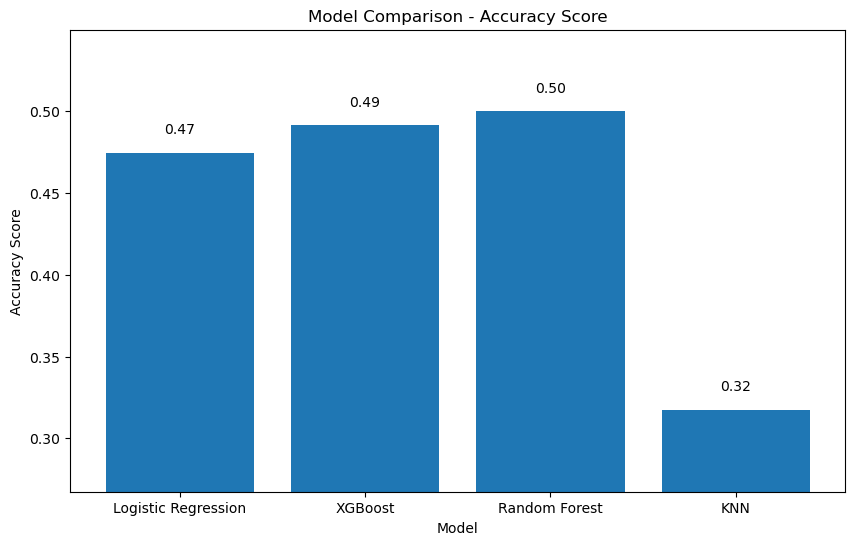

In [22]:
import matplotlib.pyplot as plt

# Placeholder for accuracy scores
accuracy_scores = {}

# Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test_scaled))
accuracy_scores['Logistic Regression'] = logreg_accuracy

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_scores['XGBoost'] = xgb_accuracy

# Random Forest
rf_accuracy = accuracy_score(y_test, rf.predict(X_test_scaled))
accuracy_scores['Random Forest'] = rf_accuracy

# KNN
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
accuracy_scores['KNN'] = knn_accuracy

# Now create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Score')
plt.ylim([min(accuracy_scores.values()) - 0.05, max(accuracy_scores.values()) + 0.05])
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()


In [23]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Training the logistic regression model with class_weight='balanced'
# logreg = LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced')
# logreg.fit(X_train_scaled, y_train.ravel())  # Ensure y_train is properly shaped with ravel()
# y_pred = logreg.predict(X_test_scaled)

# # Model Evaluation
# print("Logistic Regression with Class Weights")
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
# print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [24]:
# # 'Crime_Category' is target variable
# class_counts = crime_df['Crime_Category'].value_counts()
# print(class_counts)